# Exploratory Data Analysis of the Pokemon_data.db

In [78]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [2]:
# Function to execute SQL query and return results
def execute_query(query):
    # Connect to the database
    conn = sqlite3.connect('pokemon_data.db')
    # Create a cursor object
    cursor = conn.cursor()
    # Execute the query
    cursor.execute(query)
    # Fetch all rows
    rows = cursor.fetchall()
    # Close cursor and connection
    cursor.close()
    conn.close()
    # Return the results
    return rows

## Basic EDA

    1.Which Pokémon have the highest and lowest total stats (HP, Attack, Defense, Special Attack, Special Defense, Speed)(by generation/type/all?
    2.How does the distribution of Pokémon types vary across different generations, considering both primary and secondary types?
    (Which Pokémon types are most commonly associated with certain generations?)
    3.Are there any outliers or anomalies in the data that need further investigation?
        
    
    4.How does the average height and weight of Pokémon vary across different generations, considering both primary and secondary types?*
    
    5.Are there any significant differences in the average base stats of Pokémon with and without evolutions?

###     What are the different Pokémon species in the Pokédex?

In [6]:
# Example usage: Running a SQL query
query = """
SELECT DISTINCT name
FROM pokedex;
"""
results = execute_query(query)
# Print the results
for name, in results:
    print(name)

bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
spearow
fearow
ekans
arbok
pikachu
raichu
sandshrew
sandslash
nidoran-f
nidorina
nidoqueen
nidoran-m
nidorino
nidoking
clefairy
clefable
vulpix
ninetales
jigglypuff
wigglytuff
zubat
golbat
oddish
gloom
vileplume
paras
parasect
venonat
venomoth
diglett
dugtrio
meowth
persian
psyduck
golduck
mankey
primeape
growlithe
arcanine
poliwag
poliwhirl
poliwrath
abra
kadabra
alakazam
machop
machoke
machamp
bellsprout
weepinbell
victreebel
tentacool
tentacruel
geodude
graveler
golem
ponyta
rapidash
slowpoke
slowbro
magnemite
magneton
farfetchd
doduo
dodrio
seel
dewgong
grimer
muk
shellder
cloyster
gastly
haunter
gengar
onix
drowzee
hypno
krabby
kingler
voltorb
electrode
exeggcute
exeggutor
cubone
marowak
hitmonlee
hitmonchan
lickitung
koffing
weezing
rhyhorn
rhydon
chansey
tangela
kangaskhan
horsea
seadra
goldeen
seakin

### Which Pokémon have the highest attack and defense?

In [107]:
query = """
SELECT name, attack, defense
FROM stats
ORDER BY attack DESC, defense DESC
LIMIT 10;
"""
results = execute_query(query)

#pokemon with highest stat in attack and defense in DF pokemon_df
pokemon_df=pd.DataFrame(results, columns=['name', 'attack', 'defense'])
# Print the DF
pokemon_df

,name,attack,defense
0,kartana,181.0,131.0
1,rampardos,165.0,60.0
2,regigigas,160.0,110.0
3,slaking,160.0,100.0
4,groudon,150.0,140.0
5,zekrom,150.0,120.0
6,rayquaza,150.0,90.0
7,deoxys-normal,150.0,50.0
8,haxorus,147.0,90.0
9,glastrier,145.0,130.0


### What are the types of Pokémon (primary and secondary) that have the highest and lowest base stats (HP, Attack, Defense, Special Attack, Special Defense, Speed)?

In [15]:
# Example usage: Running a SQL query
query = """
SELECT generation, COUNT(*) as pokemon_count
FROM evolutions
GROUP BY generation;
"""
results = execute_query(query)
tot=0
# Print the results
for generation,count in results:
    print(f"Generation '{generation}' has '{count}' Pokemons.")
    tot += count
print(f"The Pokemon universe has in total '{tot}' Pokemons.")

Generation '1' has '151' Pokemons.
Generation '2' has '100' Pokemons.
Generation '3' has '135' Pokemons.
Generation '4' has '107' Pokemons.
Generation '5' has '156' Pokemons.
Generation '6' has '72' Pokemons.
Generation '7' has '88' Pokemons.
Generation '8' has '96' Pokemons.
Generation '9' has '120' Pokemons.
The Pokemon universe has in total '1025' Pokemons.


###     What is the distribution of Pokémon types (primary and secondary) in the Pokédex?

In [34]:
# Example usage: Running a SQL query
query = """
SELECT primary_type,secondary_type, COUNT(*) as count
FROM pokedex
GROUP BY primary_type , secondary_type
"""
results = execute_query(query)

# Create the DataFrame
types_df=pd.DataFrame(results, columns=['primary_type', 'secondary_type', 'count'])

# Replace 'None' values in 'secondary_type' with NaN
types_df['secondary_type'] = types_df['secondary_type'].replace('None', np.nan)

#Print the output of the Query
types_df

,primary_type,secondary_type,count
0,bug,None,23
1,bug,dark,1
2,bug,electric,4
3,bug,fairy,2
4,bug,fighting,4
...,...,...,...
198,water,ice,4
199,water,poison,3
200,water,psychic,6
201,water,rock,5


### How does the height, weight and stats of Pokémons across different types?

In [104]:
# Example usage: Running a SQL query
query = """
SELECT p.primary_type,
       AVG(p.height) AS avg_height,
       AVG(p.weight) AS avg_weight,
       AVG(s.hp) AS avg_hp,
       AVG(s.attack) AS avg_attack,
       AVG(s.defense) AS avg_defense,
       AVG(s.`special-attack`) AS avg_special_attack,
       AVG(s.`special-defense`) AS avg_special_defense,
       AVG(s.speed) AS avg_speed
FROM pokedex p
JOIN stats s ON p.name = s.name
GROUP BY p.primary_type;
"""
results = execute_query(query)

# Create the DataFrame
hw_df=pd.DataFrame(results, columns=['Type', 'Avg_height', 'Avg_weight','Avg_hp','Avg_attack','Avg_defense','Avg_special_attack','Avg_special_defense','Avg_speed'])

#Print the output of the Query
hw_df

,Type,Avg_height,Avg_weight,Avg_hp,Avg_attack,Avg_defense,Avg_special_attack,Avg_special_defense,Avg_speed
0,bug,8.771084,322.265060,56.493976,67.554217,69.578313,56.433735,63.313253,61.265060
1,dark,13.200000,783.800000,75.800000,88.000000,71.622222,72.933333,70.755556,75.622222
2,dragon,18.000000,1049.675676,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189
3,electric,10.966102,523.644068,64.779661,72.966102,62.101695,84.830508,66.559322,85.067797
4,fairy,8.413793,287.034483,71.379310,66.827586,70.965517,76.103448,85.793103,65.000000
5,fighting,13.100000,749.200000,76.075000,102.700000,72.350000,53.175000,67.275000,69.975000
6,fire,12.015152,706.909091,69.833333,82.606061,66.833333,83.272727,69.545455,74.106061
7,flying,11.777778,385.222222,70.000000,79.888889,66.000000,68.444444,68.777778,83.000000
8,ghost,11.485714,556.114286,61.800000,68.600000,75.485714,84.114286,80.828571,60.342857
9,grass,9.097087,314.504854,65.766990,74.349515,70.893204,73.262136,69.300971,59.543689


In [105]:
hw_df['Avg_total_stats']=hw_df['Avg_hp']+hw_df['Avg_attack']+hw_df['Avg_defense']+hw_df['Avg_special_attack']+hw_df['Avg_special_defense']+hw_df['Avg_speed']
hw_df

,Type,Avg_height,Avg_weight,Avg_hp,Avg_attack,Avg_defense,Avg_special_attack,Avg_special_defense,Avg_speed,Avg_total_stats
0,bug,8.771084,322.265060,56.493976,67.554217,69.578313,56.433735,63.313253,61.265060,374.638554
1,dark,13.200000,783.800000,75.800000,88.000000,71.622222,72.933333,70.755556,75.622222,454.733333
2,dragon,18.000000,1049.675676,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189,490.162162
3,electric,10.966102,523.644068,64.779661,72.966102,62.101695,84.830508,66.559322,85.067797,436.305085
4,fairy,8.413793,287.034483,71.379310,66.827586,70.965517,76.103448,85.793103,65.000000,436.068966
5,fighting,13.100000,749.200000,76.075000,102.700000,72.350000,53.175000,67.275000,69.975000,441.550000
6,fire,12.015152,706.909091,69.833333,82.606061,66.833333,83.272727,69.545455,74.106061,446.196970
7,flying,11.777778,385.222222,70.000000,79.888889,66.000000,68.444444,68.777778,83.000000,436.111111
8,ghost,11.485714,556.114286,61.800000,68.600000,75.485714,84.114286,80.828571,60.342857,431.171429
9,grass,9.097087,314.504854,65.766990,74.349515,70.893204,73.262136,69.300971,59.543689,413.116505


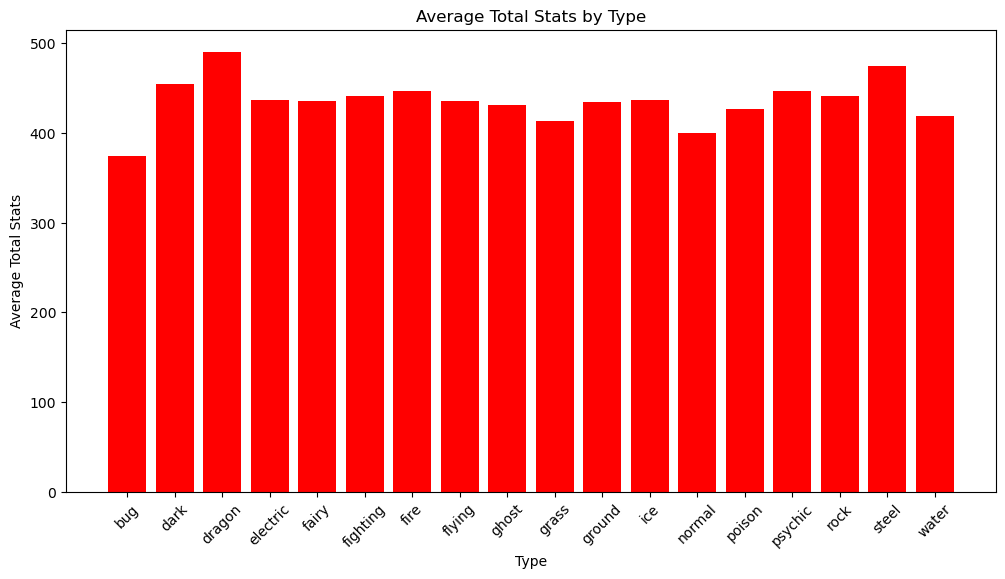

In [66]:
# Plot average weight
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hw_df['Type'], hw_df['Avg_total_stats'], color='Red')
plt.xlabel('Type')  # Set the x-axis label
plt.ylabel('Average Total Stats')  # Set the y-axis label
plt.title('Average Total Stats by Type')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show plot

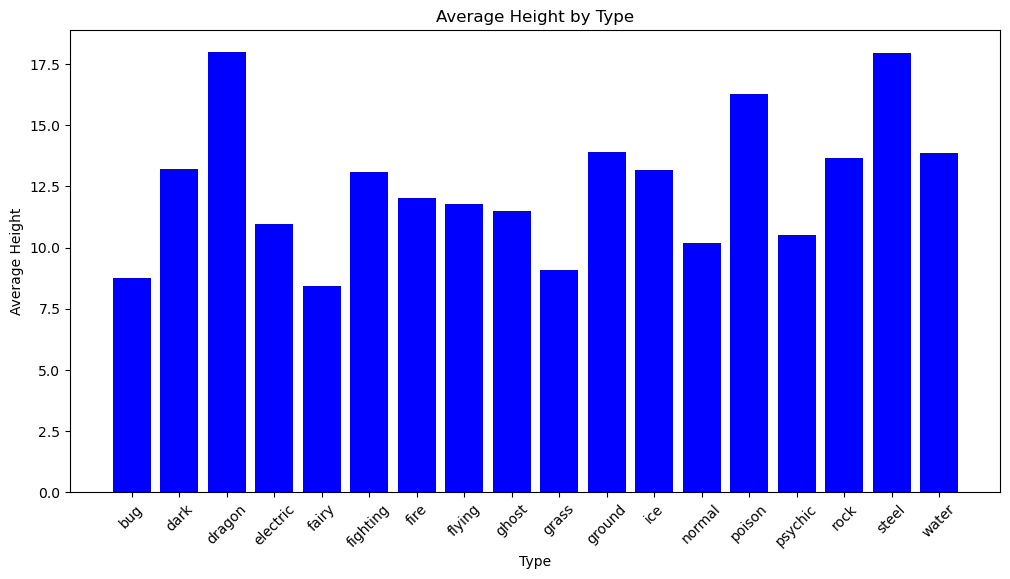

In [62]:
# Plot average weight
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hw_df['Type'], hw_df['Avg_height'], color='Blue')
plt.xlabel('Type')  # Set the x-axis label
plt.ylabel('Average Height')  # Set the y-axis label
plt.title('Average Height by Type')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show plot

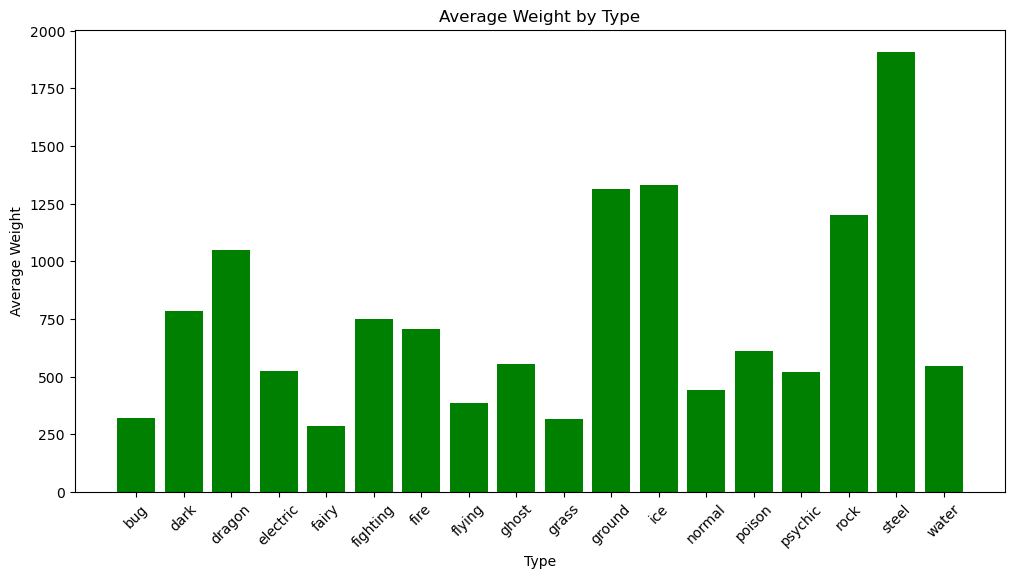

In [63]:
# Plot average weight
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hw_df['Type'], hw_df['Avg_weight'], color='green')
plt.xlabel('Type')  # Set the x-axis label
plt.ylabel('Average Weight')  # Set the y-axis label
plt.title('Average Weight by Type')  # Set the title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show plot

### Which Pokémon have the highest and lowest base stats (HP, Attack, Defense, Special Attack, Special Defense, Speed)?

In [37]:
#HP
# Example usage: Running a SQL query
query = """

"""
results = execute_query(query)
# Print the results
for name in results:
    print(name)

In [38]:
#Attack

In [39]:
#Defense

In [40]:
#Special Attack

In [54]:
#Special Defence

In [55]:
#speed

### How many evolutions exist for each Pokémon, and what are their names?

In [101]:
# Example usage: Running a SQL query
query = """
SELECT e.id, e.name,
       (SELECT GROUP_CONCAT(e2.evolves_to) 
        FROM evolutions e2 
        WHERE e2.id = e.id 
        AND e2.evolves_to IS NOT NULL) AS evolution_names
FROM evolutions e
GROUP BY e.id;
"""
results = execute_query(query)
evolutions_df = pd.DataFrame(results, columns=['id','name','evolves_to'])

# Replace 'NaN' strings in evolves_to with actual NaN values
evolutions_df['evolves_to'] = evolutions_df['evolves_to'].replace('null', np.nan)

# Convert strings in 'evolves_to' column to lists
evolutions_df['evolves_to'] = evolutions_df['evolves_to'].apply(lambda x: json.loads(x) if pd.notna(x) else [])

# Count the number of elements in each list and store the result in a new column 'num_of_evolutions'
evolutions_df['num_of_evolutions'] = evolutions_df['evolves_to'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sort the DataFrame in descending order of 'num_of_evolutions' and print the first 10 rows
evolutions_df_sorted = evolutions_df.sort_values(by='num_of_evolutions', ascending=False)
evolutions_df_sorted.head(20)

,id,name,evolves_to,num_of_evolutions
132,133,eevee,"[vaporeon, jolteon, flareon, espeon, umbreon, ...",8
839,840,applin,"[flapple, appletun, dipplin]",3
235,236,tyrogue,"[hitmonlee, hitmonchan, hitmontop]",3
934,935,charcadet,"[armarouge, ceruledge]",2
122,123,scyther,"[scizor, kleavor]",2
60,61,poliwhirl,"[poliwrath, politoed]",2
365,366,clamperl,"[huntail, gorebyss]",2
280,281,kirlia,"[gardevoir, gallade]",2
411,412,burmy,"[wormadam, mothim]",2
289,290,nincada,"[ninjask, shedinja]",2
